In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file = pd.read_csv('turnover.csv',encoding='ISO-8859-1')
df = pd.DataFrame(file)
df.head()

stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
1  22.965092      1      m  33.0            Banks          HR        empjs   
2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
4   8.410678      1      m  32.0           Retail  Commercial        youjs   

  coach head_gender greywage  way  extraversion  independ  selfcontrol  \
0    no           f    white  bus           6.2       4.1          5.7   
1    no           m    white  bus           6.2       4.1          5.7   
2    no           m    white  bus           6.2       6.2          2.6   
3    no           m    white  bus           5.4       7.6          4.9   
4   yes           f    white  bus           3.0       4.1          8.0   

   anxiety  novator  
0      7.1      8.3  
1      7.1      8.3  
2      4.8      8.3  
3      2.5      6.7  
4      7.1      3.7

# Diagram of the category variables

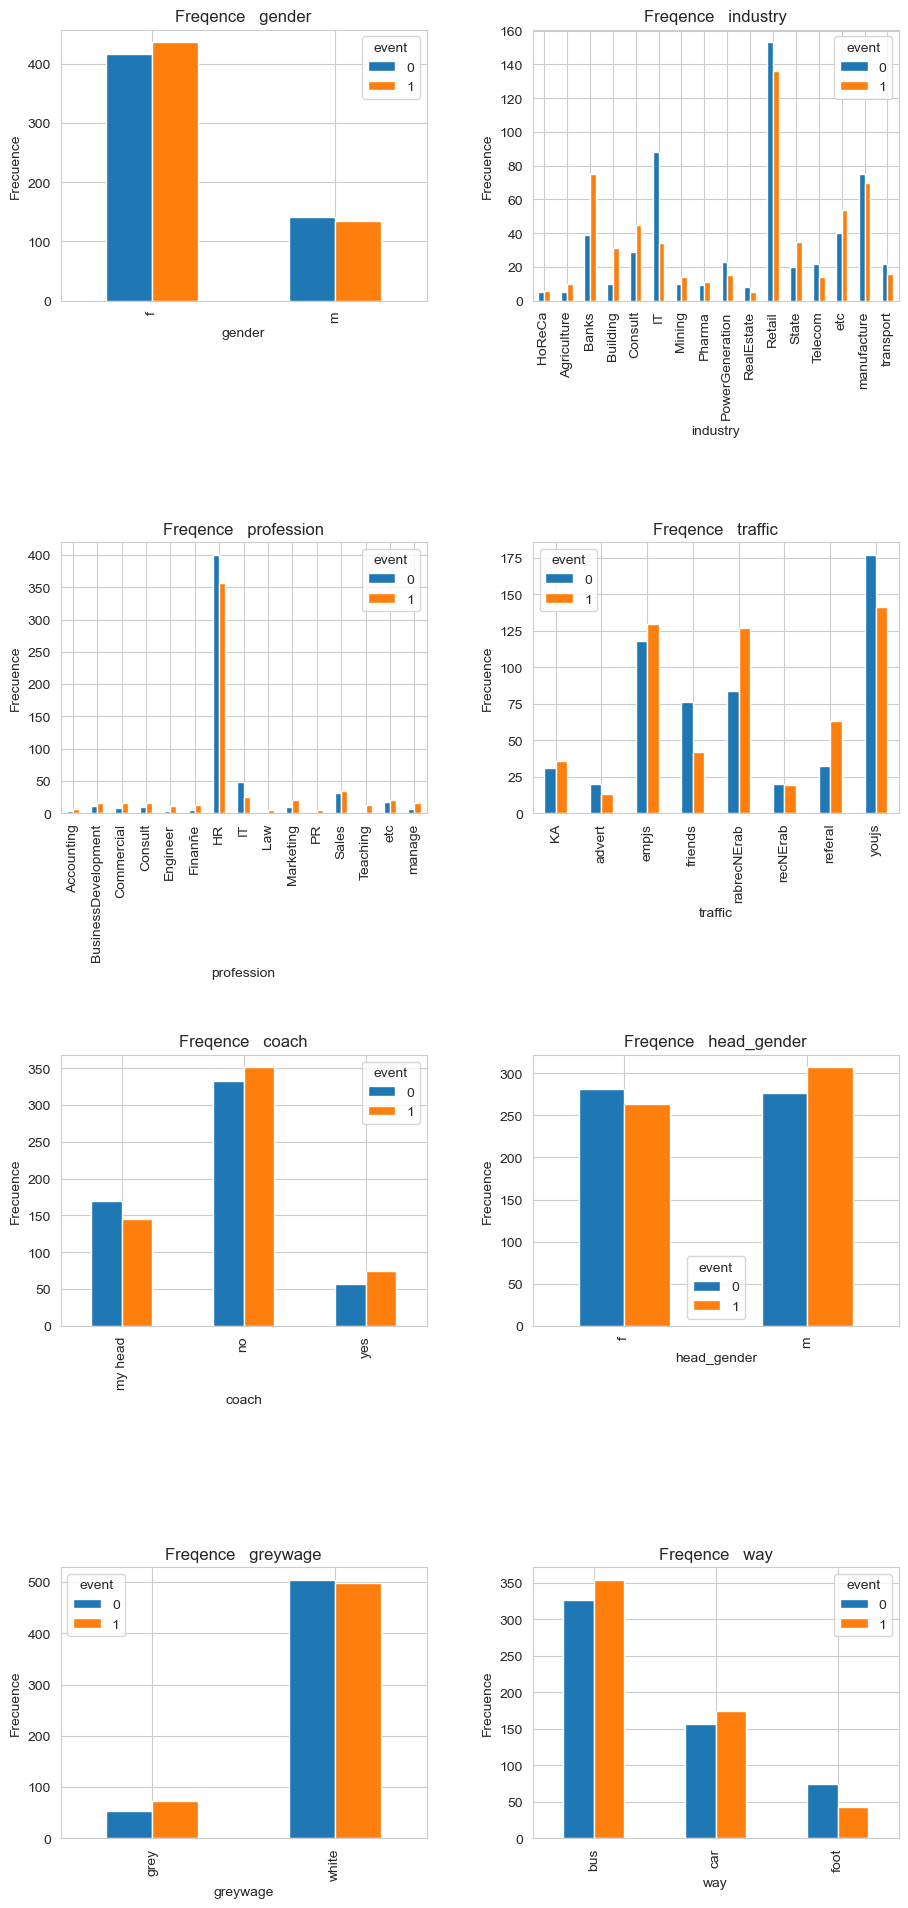

In [8]:
rows    = 4
columns = 2
c       = 1 # Inicializar plot counter
df_objects = df.select_dtypes(include=[object])
# Histograma categorical variables
fig = plt.figure(figsize=(10,20))
for i in df_objects.columns.values:

    ax = plt.subplot(rows,columns,c)
    pd.crosstab(df[i],df.event).plot(kind='bar',ax=ax)
    plt.title('Freqence   {}'.format(i))
    plt.ylabel('Frecuence')
    plt.xlabel('{}'.format(i))
    plt.tight_layout(pad=4.0)
    c = c + 1

# Diagram of the contunious  variables

In [9]:
import plotly.express as px

# Create a dictionary mapping event values to colors
color_map = {0: 'blue', 1: 'orange'}

df_objects2 = df.select_dtypes(include=[np.float64] or [np.int64])

for i in df_objects2.columns.values:
    fig = px.histogram(df, x=i, color='event', marginal='box', barmode='group', color_discrete_map=color_map)
    fig.show()



C:\Users\q\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\q\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\q\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\q\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\q\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Con

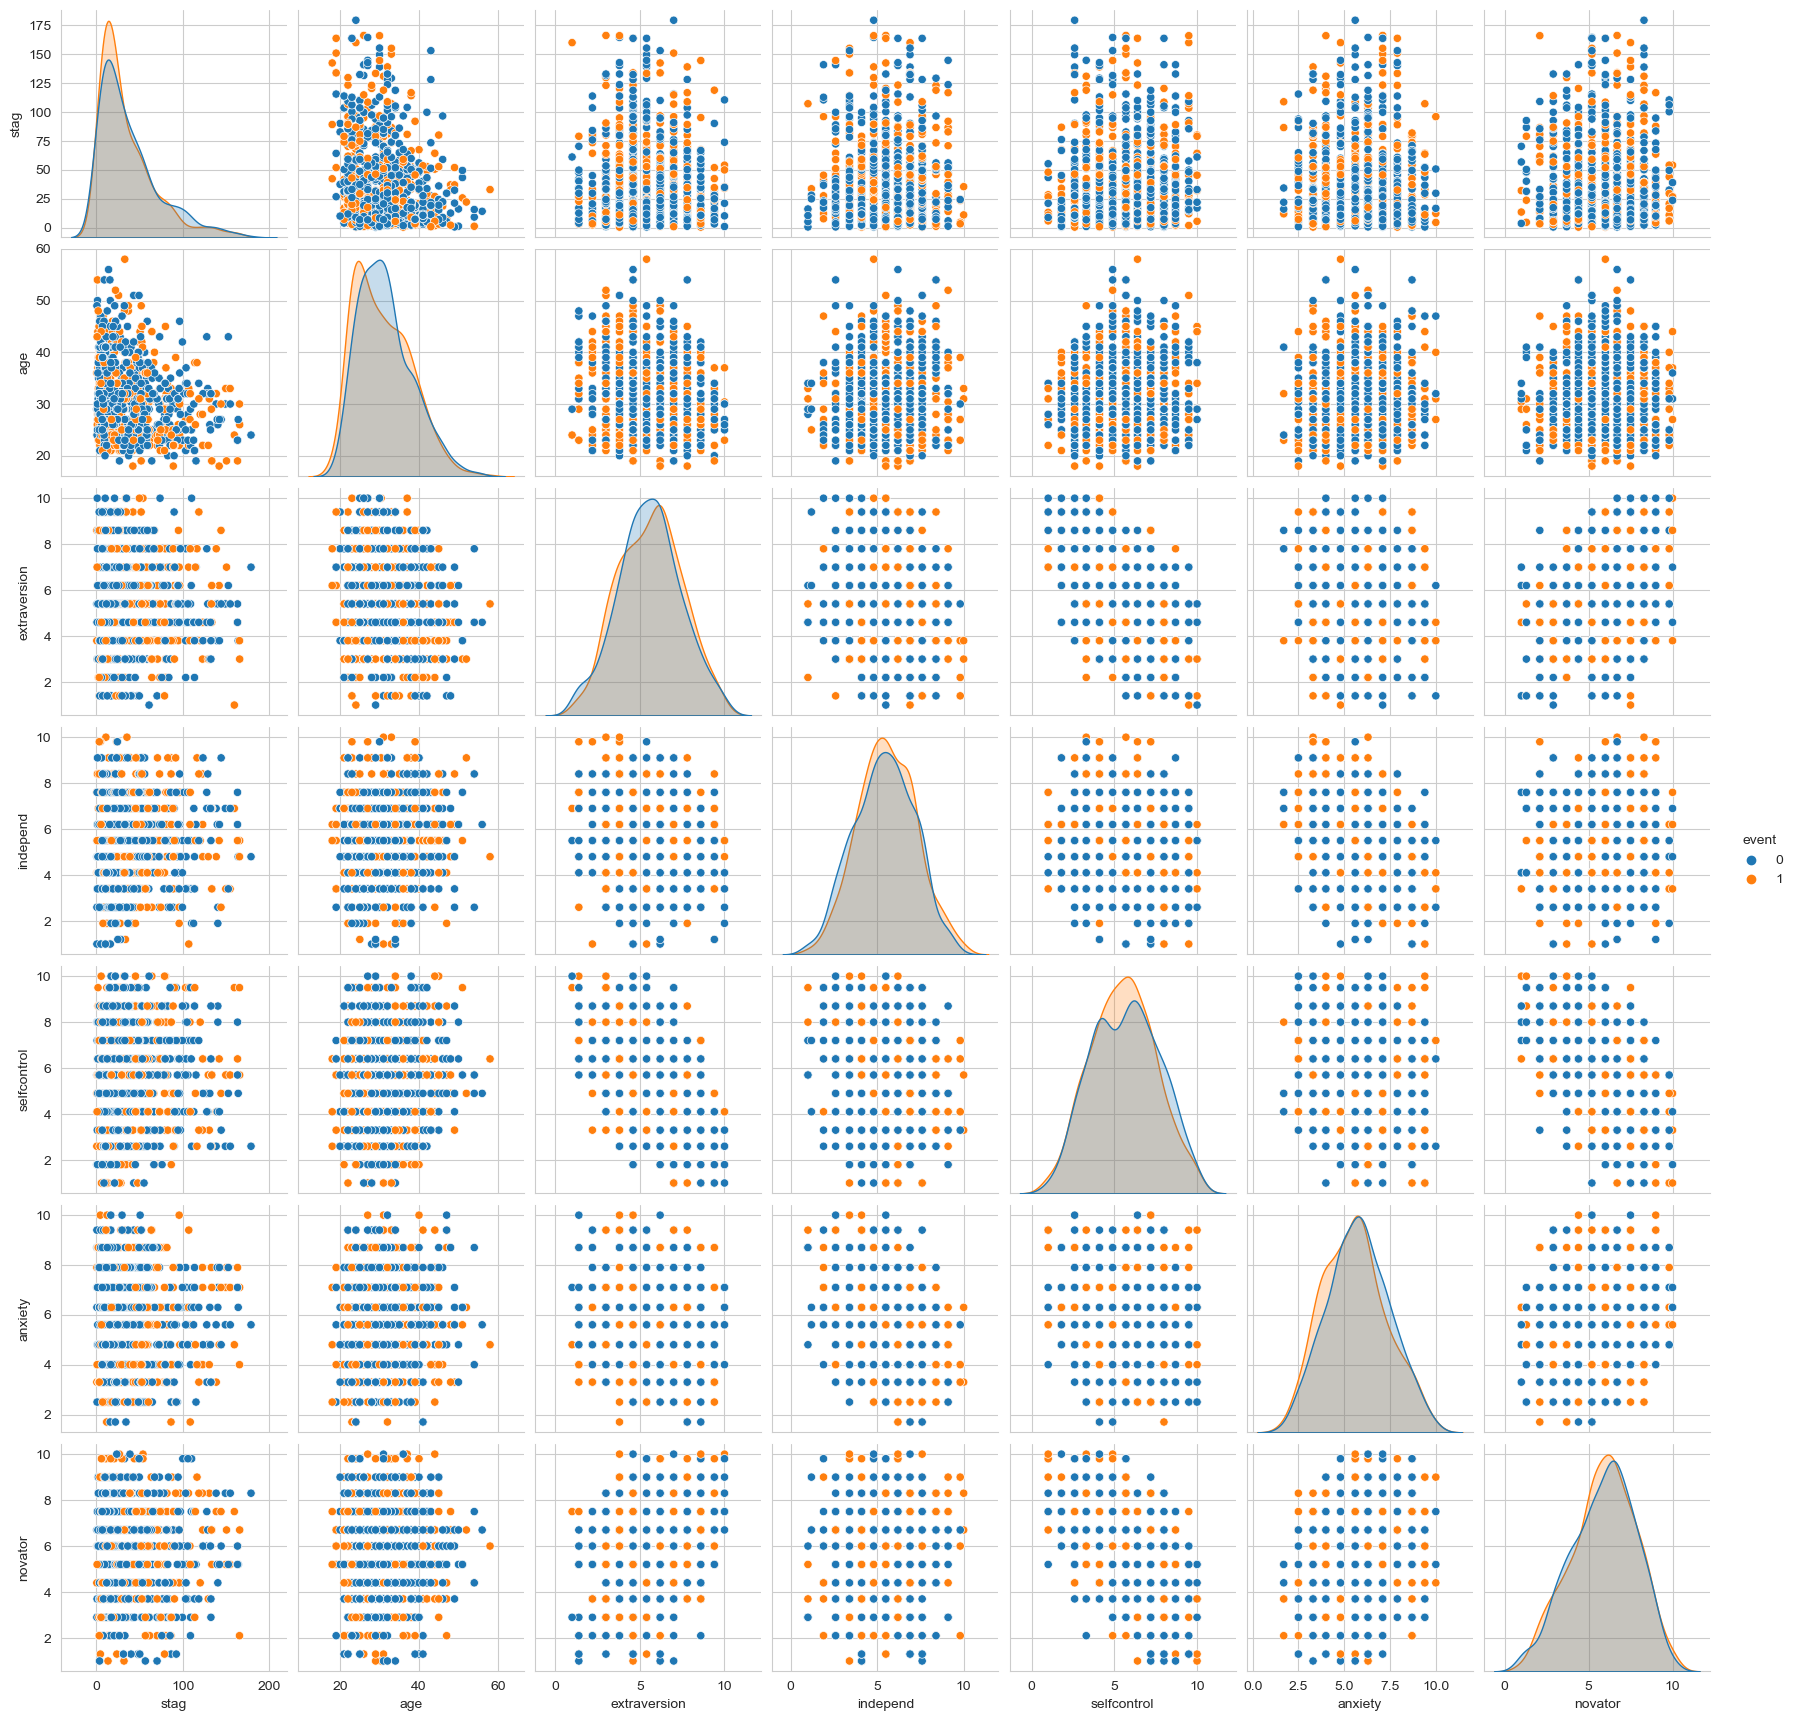

In [15]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np

turnover2 = df.copy()
encoder = LabelEncoder()

turnover2['gender'] = encoder.fit_transform(turnover2['gender'])
turnover2['industry'] = encoder.fit_transform(turnover2['industry'])
turnover2['profession'] = encoder.fit_transform(turnover2['profession'])
turnover2['traffic'] = encoder.fit_transform(turnover2['traffic'])
turnover2['coach'] = encoder.fit_transform(turnover2['coach'])
turnover2['head_gender'] = encoder.fit_transform(turnover2['head_gender'])
turnover2['greywage'] = encoder.fit_transform(turnover2['greywage'])
turnover2['way'] = encoder.fit_transform(turnover2['way'])

df = df.replace([np.inf, -np.inf], np.nan)
sns.pairplot(data=df[['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'event']], hue='event');

In [11]:


import plotly.express as px
df_corr = turnover2.corr().round(2)
fig = px.imshow(df_corr, text_auto = True, labels=dict(color="Correlation"), width=800, height=800)
fig.show()

# PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

turnover3 = turnover2.drop(columns=['event'])
X= turnover3
for i in range (0,16):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    print(i,'_components', pca.explained_variance_ratio_)


0 _components []
1 _components [0.92512714]
2 _components [0.92512714 0.03786064]
3 _components [0.92512714 0.03786064 0.0139859 ]
4 _components [0.92512714 0.03786064 0.0139859  0.00596456]
5 _components [0.92512714 0.03786064 0.0139859  0.00596456 0.00483203]
6 _components [0.92512714 0.03786064 0.0139859  0.00596456 0.00483203 0.00373711]
7 _components [0.92512714 0.03786064 0.0139859  0.00596456 0.00483203 0.00373711
 0.00333072]
8 _components [0.92512714 0.03786064 0.0139859  0.00596456 0.00483203 0.00373711
 0.00333072 0.00238391]
9 _components [0.92512714 0.03786064 0.0139859  0.00596456 0.00483203 0.00373711
 0.00333072 0.00238391 0.0012091 ]
10 _components [9.25127140e-01 3.78606386e-02 1.39859027e-02 5.96455689e-03
 4.83202750e-03 3.73711090e-03 3.33071880e-03 2.38391146e-03
 1.20909591e-03 5.36221602e-04]
11 _components [9.25127140e-01 3.78606386e-02 1.39859027e-02 5.96455689e-03
 4.83202750e-03 3.73711090e-03 3.33071880e-03 2.38391146e-03
 1.20909591e-03 5.36221602e-04 3.52